In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import pycountry_convert as pc

In [3]:
df= pd.read_csv('commodity_trade_statistics.csv')
df

country_or_area  year  comm_code  \
0           Afghanistan  2016      10410   
1           Afghanistan  2016      10420   
2           Afghanistan  2008      10210   
3               Albania  2016      10290   
4               Albania  2016      10392   
...                 ...   ...        ...   
1048570          Malawi  1991     120210   
1048571          Malawi  1991     120210   
1048572          Malawi  1991     120220   
1048573          Malawi  1991     120220   
1048574          Malawi  1991     120600   

                                               commodity       flow  \
0                                            Sheep, live     Export   
1                                            Goats, live     Export   
2                Bovine animals, live pure-bred breeding     Import   
3        Bovine animals, live, except pure-bred breeding     Import   
4          Swine, live except pure-bred breeding > 50 kg     Import   
...                                                  ...        ...   
1048570       Ground-nuts in shell not roasted or cooked     Export   
1048571       Ground-nuts in shell not roasted or cooked  Re-Export   
1048572       Ground-nuts shelled, not roasted or cooked     Import   
1048573       Ground-nuts shelled, not roasted or cooked     Export   
1048574                                  Sunflower seeds     Import   

         trade_usd  weight_kg        quantity_name  quantity  \
0             6088     2339.0      Number of items      51.0   
1             3958      984.0      Number of items      53.0   
2          1026804      272.0      Number of items    3769.0   
3          2414533  1114023.0      Number of items    6853.0   
4         14265937  9484953.0      Number of items   96040.0   
...            ...        ...                  ...       ...   
1048570        979      613.0  Weight in kilograms     613.0   
1048571        979      613.0  Weight in kilograms     613.0   
1048572      53965    60000.0  Weight in kilograms   60000.0   
1048573     616393   866000.0  Weight in kilograms  866000.0   
1048574      45823    10687.0  Weight in kilograms   10687.0   

                                                  category  
0                                          01_live_animals  
1                                          01_live_animals  
2                                          01_live_animals  
3                                          01_live_animals  
4                                          01_live_animals  
...                                                    ...  
1048570  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...  
1048571  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...  
1048572  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...  
1048573  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...  
1048574  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...  

[1048575 rows x 10 columns]

In [5]:
df.isnull().sum()

country_or_area        0
year                   0
comm_code              0
commodity              0
flow                   0
trade_usd              0
weight_kg           8434
quantity_name          0
quantity           23281
category               0
dtype: int64

In [6]:
#Fill the null values with the mean value of the columns
df['weight_kg']= df['weight_kg'].fillna(value=df['weight_kg'].mean())
df['quantity']= df['quantity'].fillna(value=df['quantity'].mean())

In [7]:
df.isnull().sum()

country_or_area    0
year               0
comm_code          0
commodity          0
flow               0
trade_usd          0
weight_kg          0
quantity_name      0
quantity           0
category           0
dtype: int64

In [8]:
df['year']=pd.to_datetime(df['year'], format = "%Y")

In [9]:
df['year']=df['year'].dt.to_period('Y')

In [10]:
df.dtypes

country_or_area           object
year               period[A-DEC]
comm_code                  int64
commodity                 object
flow                      object
trade_usd                  int64
weight_kg                float64
quantity_name             object
quantity                 float64
category                  object
dtype: object

Calculating the price index

In [11]:
#to avoid have errors in my division, I will replace the zeros in weight_kg column with nan
df['weight_kg'].replace(0, np.nan, inplace=True)

In [12]:
#Creating the price index column
df['price_index'] = df['trade_usd'] / df['weight_kg']

In [13]:
#dropping the null values
df.dropna(subset=['price_index'], inplace=True)

In [14]:
df

country_or_area  year  comm_code  \
0           Afghanistan  2016      10410   
1           Afghanistan  2016      10420   
2           Afghanistan  2008      10210   
3               Albania  2016      10290   
4               Albania  2016      10392   
...                 ...   ...        ...   
1048570          Malawi  1991     120210   
1048571          Malawi  1991     120210   
1048572          Malawi  1991     120220   
1048573          Malawi  1991     120220   
1048574          Malawi  1991     120600   

                                               commodity       flow  \
0                                            Sheep, live     Export   
1                                            Goats, live     Export   
2                Bovine animals, live pure-bred breeding     Import   
3        Bovine animals, live, except pure-bred breeding     Import   
4          Swine, live except pure-bred breeding > 50 kg     Import   
...                                                  ...        ...   
1048570       Ground-nuts in shell not roasted or cooked     Export   
1048571       Ground-nuts in shell not roasted or cooked  Re-Export   
1048572       Ground-nuts shelled, not roasted or cooked     Import   
1048573       Ground-nuts shelled, not roasted or cooked     Export   
1048574                                  Sunflower seeds     Import   

         trade_usd  weight_kg        quantity_name  quantity  \
0             6088     2339.0      Number of items      51.0   
1             3958      984.0      Number of items      53.0   
2          1026804      272.0      Number of items    3769.0   
3          2414533  1114023.0      Number of items    6853.0   
4         14265937  9484953.0      Number of items   96040.0   
...            ...        ...                  ...       ...   
1048570        979      613.0  Weight in kilograms     613.0   
1048571        979      613.0  Weight in kilograms     613.0   
1048572      53965    60000.0  Weight in kilograms   60000.0   
1048573     616393   866000.0  Weight in kilograms  866000.0   
1048574      45823    10687.0  Weight in kilograms   10687.0   

                                                  category  price_index  
0                                          01_live_animals     2.602822  
1                                          01_live_animals     4.022358  
2                                          01_live_animals  3775.014706  
3                                          01_live_animals     2.167400  
4                                          01_live_animals     1.504060  
...                                                    ...          ...  
1048570  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...     1.597064  
1048571  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...     1.597064  
1048572  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...     0.899417  
1048573  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...     0.711770  
1048574  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...     4.287733  

[1030820 rows x 11 columns]

COMMODITY WITH THE HIGHEST PRICE INDEX PER YEAR

In [15]:
highest_price_index_per_year=df.loc[df.groupby('year')['price_index'].idxmax()]
highest_price_index_per_year

country_or_area  year  comm_code  \
385172               Japan  1988      51110   
385139               Japan  1989      51110   
385107               Japan  1990      51110   
385075               Japan  1991      51110   
510974   Brunei Darussalam  1992      71230   
385010               Japan  1993      51110   
384978               Japan  1994      51110   
384948               Japan  1995      51110   
851329              Uganda  1996     100610   
375328             Finland  1997      51110   
384853               Japan  1998      51110   
53420       United Kingdom  1999      10599   
934336          Luxembourg  2000     110423   
384759               Japan  2001      51110   
384728               Japan  2002      51110   
375177             Finland  2003      51110   
382381                Iran  2004      51199   
32556             Mongolia  2005      10600   
303244              France  2006      40700   
29631           Luxembourg  2007      10111   
857526         Afghanistan  2008     110100   
412861             Uruguay  2009      51110   
387575          Luxembourg  2010      51191   
374991             Finland  2011      51110   
33137           Mozambique  2012      10111   
1003312              Egypt  2013     120210   
555198               Egypt  2014      70890   
374904             Finland  2015      51110   
384344               Japan  2016      51110   

                                                 commodity       flow  \
385172                                        Semen bovine     Import   
385139                                        Semen bovine     Import   
385107                                        Semen bovine     Import   
385075                                        Semen bovine     Import   
510974   Mushrooms and truffles, dried, not further pre...     Import   
385010                                        Semen bovine     Import   
384978                                        Semen bovine     Import   
384948                                        Semen bovine     Import   
851329                   Rice in the husk (paddy or rough)     Export   
375328                                        Semen bovine     Import   
384853                                        Semen bovine     Import   
53420     Poultry, live except domestic fowls, > 185 grams     Import   
934336    Maize (corn), hulled, pearled, sliced or kibbled     Export   
384759                                        Semen bovine     Import   
384728                                        Semen bovine     Import   
375177                                        Semen bovine     Import   
382381   Animal products and domestic animal carcass (n...     Import   
32556                   Animals, live, except farm animals     Export   
303244    Birds eggs, in shell, fresh, preserved or cooked     Import   
29631                      Horses, live pure-bred breeding     Export   
857526                               Wheat or meslin flour     Import   
412861                                        Semen bovine     Export   
387575          Fish, shellfish and crustaceans (non-food)     Export   
374991                                        Semen bovine     Export   
33137                      Horses, live pure-bred breeding     Export   
1003312         Ground-nuts in shell not roasted or cooked  Re-Import   
555198       Legumes except peas & beans, fresh or chilled     Import   
374904                                        Semen bovine     Import   
384344                                        Semen bovine     Import   

         trade_usd  weight_kg        quantity_name      quantity  \
385172     2271010       33.0  Weight in kilograms  3.300000e+01   
385139     3102849       45.0  Weight in kilograms  4.500000e+01   
385107     3442851       69.0  Weight in kilograms  6.900000e+01   
385075     3443232       69.0  Weight in kilograms  6.900000e+01   
510974      194844       11.0  Weight in kilograms  1.100000e+01   
3

In [16]:
from pypalettes import load_cmap
cmap = load_cmap('Abbott',type='continuous')

C:\Users\Samue\anaconda3\Lib\site-packages\pypalettes\main.py:128: UserWarning: Using a continuous palette for a non-sequential palette can pose a problem in terms of the meaning of the graphs. Shut down this warning with `type_warning = False`. See https://blog.datawrapper.de/colors/ for more information.
  warnings.warn(


In [17]:
unique_colors = sns.color_palette("hsv", n_colors=29)

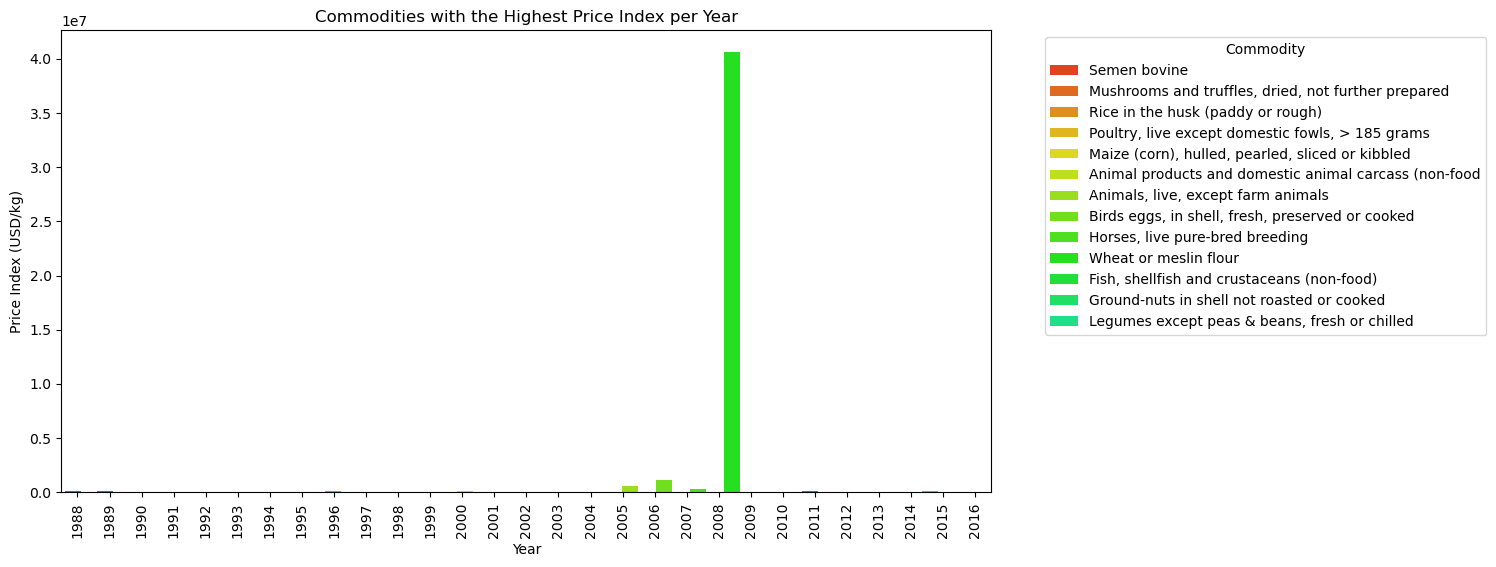

In [19]:
# Plotting a graph to show commodities with highest price index per year
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='year', y='price_index', hue='commodity', data=highest_price_index_per_year, palette=unique_colors)
bar_width = 0.5
for bar in ax.patches:
    bar.set_width(bar_width)
plt.title('Commodities with the Highest Price Index per Year')
plt.xlabel('Year')
plt.ylabel('Price Index (USD/kg)')
plt.legend(title='Commodity',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#COMMODITY WITH THE LOWEST PRICE INDEX PER YEAR

In [20]:
lowest_price_index_per_year = df.loc[df.groupby('year')['price_index'].idxmin()]
lowest_price_index_per_year

country_or_area  year  comm_code  \
381547                   India  1988      50800   
639412                  Cyprus  1989      80510   
1028296                  India  1990     120300   
848133                Thailand  1991     100610   
1037384                  Japan  1992     120600   
42627    Saint Kitts and Nevis  1993      10111   
835133                 moldova  1994     100820   
23948                Indonesia  1995      10591   
30259                   Malawi  1996      10519   
958870                 Algeria  1997     121292   
194320       Brunei Darussalam  1998      30219   
30242                   Malawi  1999      10511   
943880              Mozambique  2000     110314   
48271                 Eswatini  2001      10591   
15003           Dominican Rep.  2002      10120   
47747                Sri Lanka  2003      10420   
14968           Dominican Rep.  2004      10120   
867355                Barbados  2005     110620   
340853              Mozambique  2006      40899   
960668               Argentina  2007     120210   
372319          Dominican Rep.  2008      50290   
18948               Micronesia  2009      10600   
372156                Dominica  2010      51199   
391314                 Myanmar  2011      51199   
391296                 Myanmar  2012      51000   
736030              Micronesia  2013      90950   
950562                 Nigeria  2014     110329   
364718                  Canada  2015      50590   
391254                 Myanmar  2016      51110   

                                                 commodity       flow  \
381547   Coral,seashell,cuttle bone,etc, unworked,powde...     Export   
639412                             Oranges, fresh or dried     Import   
1028296                                              Copra     Export   
848133                   Rice in the husk (paddy or rough)     Import   
1037384                                    Sunflower seeds     Export   
42627                      Horses, live pure-bred breeding     Import   
835133                                              Millet     Export   
23948                     Fowls, live domestic > 185 grams     Import   
30259     Poultry, live except domestic fowls, < 185 grams     Export   
958870                                          Sugar cane     Import   
194320   Salmonidae, not trout or salmon,fresh or chill...     Export   
30242                     Fowls, live domestic < 185 grams     Export   
943880                                 Rice groats or meal     Import   
48271                     Fowls, live domestic > 185 grams     Export   
15003                       Asses, mules and hinnies, live     Import   
47747                                          Goats, live     Export   
14968                       Asses, mules and hinnies, live     Import   
867355      Flour or meal of sago, starchy roots or tubers     Export   
340853                  Eggs, bird, not in shell not dried     Export   
960668          Ground-nuts in shell not roasted or cooked     Import   
372319   Hair & waste of badger and of other brush maki...     Import   
18948                   Animals, live, except farm animals     Import   
372156   Animal products and domestic animal carcass (n...     Export   
391314   Animal products and domestic animal carcass (n...     Import   
391296   Ambergris, civet, musk, etc for pharmaceutical...     Import   
736030                       Fennel seeds, juniper berries     Import   
950562                         Cereal pellets except wheat     Export   
364718   Feathers, down, etc. of birds, except for stuf...  Re-Import   
391254                                        Semen bovine     Export   

         trade_usd     weight_kg        quantity_name      quantity  \
381547      169221  6.759687e+06  Weight in kilograms  6.759687e+06   
639412         601  1.500000e+06  Weight in kilograms  1.500000e+06   
1028296        445  2.250000e+05  Weight in kilograms  2.250000e+05   
848133   

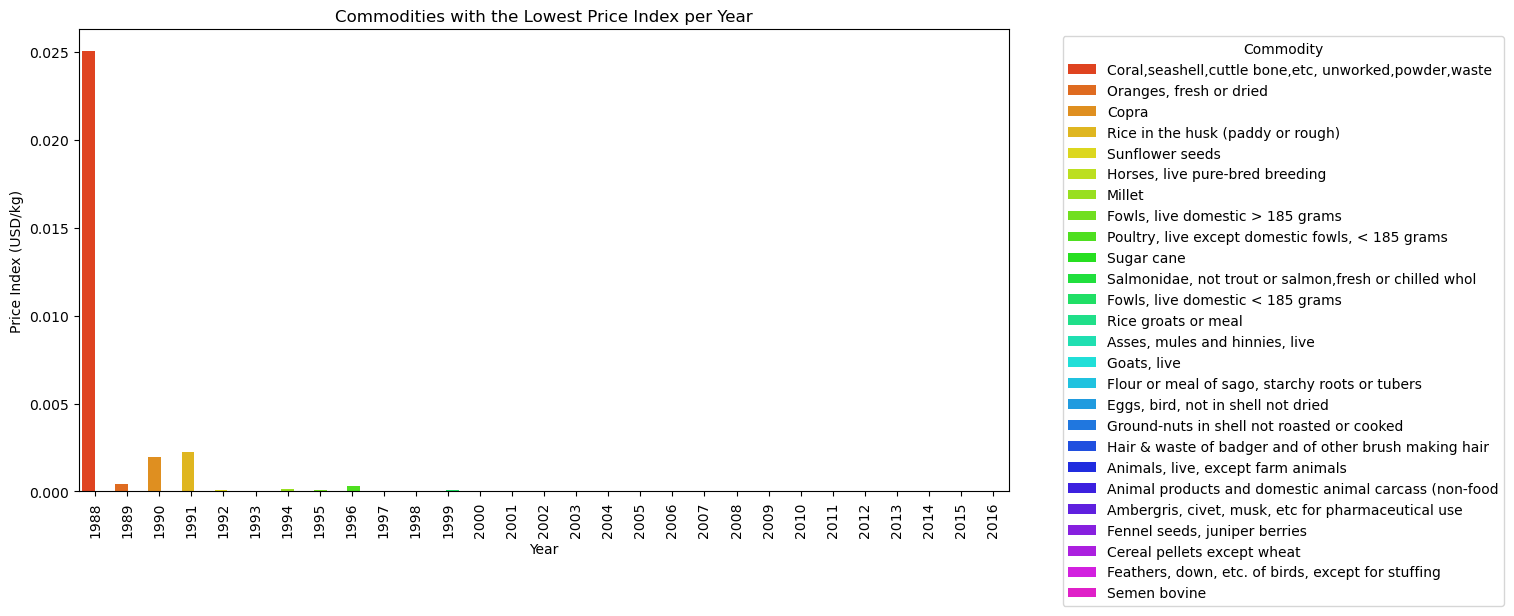

In [21]:
# Plotting a graph to show commodities with highest price index per year
plt.figure(figsize=(12, 6))
ax= sns.barplot(x='year', y='price_index', hue='commodity', data=lowest_price_index_per_year, palette=unique_colors)
bar_width = 0.4  # Specify the desired bar width
for bar in ax.patches:
    bar.set_width(bar_width)

plt.title('Commodities with the Lowest Price Index per Year')
plt.xlabel('Year')
plt.ylabel('Price Index (USD/kg)')
plt.legend(title='Commodity',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

Average price index of 'Goats, live'

In [22]:
commodity_of_interest = 'Goats, live'

In [24]:
commodity_df=df[df['commodity']==commodity_of_interest]

In [25]:
ave_price_index_Goats_live= commodity_df['price_index'].mean()

In [26]:
ave_price_index_Goats_live

12.249404747222073

In [27]:
print(f"The average price index for '{commodity_of_interest}' is: {ave_price_index_Goats_live:.2f} USD/kg")

The average price index for 'Goats, live' is: 12.25 USD/kg


Average price index of 'Semen bovine'

In [28]:
commodity_of_interest1 = 'Semen bovine'

In [29]:
commodity_df=df[df['commodity']==commodity_of_interest1]

In [30]:
ave_price_index_Semen_bovine= commodity_df['price_index'].mean()

In [31]:
print(f"The average price index for {commodity_of_interest1} is: {ave_price_index_Semen_bovine:.1f} USD/kg")

The average price index for Semen bovine is: 1943.7 USD/kg


Average price index of 'Wheat or meslin flour'

In [32]:
commodity_of_interest2 = 'Wheat or meslin flour'

In [33]:
commodity_df=df[df['commodity']==commodity_of_interest2]

In [34]:
ave_price_index_Wheat_or_meslin_flour = commodity_df['price_index'].mean()

In [35]:
print(f"The average price index for {commodity_of_interest2} is: {ave_price_index_Wheat_or_meslin_flour:.1f} USD/kg")

The average price index for Wheat or meslin flour is: 8081.2 USD/kg


Getting the price index by continent

In [36]:
# Function to convert country name to continent
def country_to_continent(country_name):
    try:
        # Getting the ISO-3166 alpha-2 country code
        country_alpha2 = pycountry.countries.lookup(country_name).alpha_2
        
        # Getting the continent code
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        
        # Mapping continent code to continent name
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        
        return continent_name
    except Exception as e:
        print(f"Error for {country_name}: {e}")
        return None

In [37]:
# Apply the function to map countries to continents
df['continent'] = df['country_or_area'].apply(country_to_continent)

Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia

Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micr

Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Cou

Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: 

Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Erro

Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record 

Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for '

Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia

Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'
Error for Central African Repuplic: Could not find a record for 'central african repuplic'

Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Erro

Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for Cook Isds: Could not find a record for 'cook isds'
Error for Cook Isds: Could not find a record for 'cook isds'
Error for Cook Isds: Could not find a record for 'coo

Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record 

Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for '

Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia

Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Erro

Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error 

Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Erro

Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia

Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micr

Error for Serbia and Montenegro: Could not find a record for 'serbia and montenegro'
Error for Serbia and Montenegro: Could not find a record for 'serbia and montenegro'
Error for Serbia and Montenegro: Could not find a record for 'serbia and montenegro'
Error for Serbia and Montenegro: Could not find a record for 'serbia and montenegro'
Error for Serbia and Montenegro: Could not find a record for 'serbia and montenegro'
Error for Serbia and Montenegro: Could not find a record for 'serbia and montenegro'
Error for Serbia and Montenegro: Could not find a record for 'serbia and montenegro'
Error for Serbia and Montenegro: Could not find a record for 'serbia and montenegro'
Error for Serbia and Montenegro: Could not find a record for 'serbia and montenegro'
Error for Serbia and Montenegro: Could not find a record for 'serbia and montenegro'
Error for Serbia and Montenegro: Could not find a record for 'serbia and montenegro'
Error for Serbia and Montenegro: Could not find a record for 'ser

Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia

Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Erro

Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for Turkey: Could not find a record for 'turkey'
Error for 

Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia

Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Erro

Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Erro

Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record 

Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for '

Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia

Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Erro

Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record 

Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error 

Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micr

Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia

Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Erro

Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error for Dominican Rep.: Could not find a record for 'dominican rep.'
Error 

Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia

Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record 

Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Erro

Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Could not find a record for 'palestine'
Error for palestine: Cou

Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia

Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SAR: Could not find a record for 'china, macao sar'
Error for China, Macao SA

Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for 'eu-28'
Error for EU-28: Could not find a record for '

Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Error for Netherlands Antilles: Could not find a record for 'netherlands antilles'
Erro

Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia '
Error for Bolivia : Could not find a record for 'bolivia

Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Error for China, Hong Kong SAR: Could not find a record for 'china, hong kong sar'
Erro

Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record for 'czech republic.'
Error for Czech Republic.: Could not find a record 

Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micronesia'
Error for Micronesia: Could not find a record for 'micr

In [38]:
# Display the Data with continents
df

country_or_area  year  comm_code  \
0           Afghanistan  2016      10410   
1           Afghanistan  2016      10420   
2           Afghanistan  2008      10210   
3               Albania  2016      10290   
4               Albania  2016      10392   
...                 ...   ...        ...   
1048570          Malawi  1991     120210   
1048571          Malawi  1991     120210   
1048572          Malawi  1991     120220   
1048573          Malawi  1991     120220   
1048574          Malawi  1991     120600   

                                               commodity       flow  \
0                                            Sheep, live     Export   
1                                            Goats, live     Export   
2                Bovine animals, live pure-bred breeding     Import   
3        Bovine animals, live, except pure-bred breeding     Import   
4          Swine, live except pure-bred breeding > 50 kg     Import   
...                                                  ...        ...   
1048570       Ground-nuts in shell not roasted or cooked     Export   
1048571       Ground-nuts in shell not roasted or cooked  Re-Export   
1048572       Ground-nuts shelled, not roasted or cooked     Import   
1048573       Ground-nuts shelled, not roasted or cooked     Export   
1048574                                  Sunflower seeds     Import   

         trade_usd  weight_kg        quantity_name  quantity  \
0             6088     2339.0      Number of items      51.0   
1             3958      984.0      Number of items      53.0   
2          1026804      272.0      Number of items    3769.0   
3          2414533  1114023.0      Number of items    6853.0   
4         14265937  9484953.0      Number of items   96040.0   
...            ...        ...                  ...       ...   
1048570        979      613.0  Weight in kilograms     613.0   
1048571        979      613.0  Weight in kilograms     613.0   
1048572      53965    60000.0  Weight in kilograms   60000.0   
1048573     616393   866000.0  Weight in kilograms  866000.0   
1048574      45823    10687.0  Weight in kilograms   10687.0   

                                                  category  price_index  \
0                                          01_live_animals     2.602822   
1                                          01_live_animals     4.022358   
2                                          01_live_animals  3775.014706   
3                                          01_live_animals     2.167400   
4                                          01_live_animals     1.504060   
...                                                    ...          ...   
1048570  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...     1.597064   
1048571  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...     1.597064   
1048572  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...     0.899417   
1048573  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...     0.711770   
1048574  12_oil_seed_oleagic_fruits_grain_seed_fruit_et...     4.287733   

        continent  
0            Asia  
1            Asia  
2            Asia  
3          Europe  
4          Europe  
...           ...  
1048570    Africa  
1048571    Africa  
1048572    Africa  
1048573    Africa  
1048574    Africa  

[1030820 rows x 12 columns]

In [ ]:
#getting the price index by continent

In [39]:
continent_price_index= df.groupby('continent')['price_index'].mean().reset_index()
continent_price_index

continent  price_index
0         Africa    16.820163
1           Asia   473.817060
2         Europe    30.264764
3  North America    12.382801
4        Oceania    20.689242
5  South America    19.412583

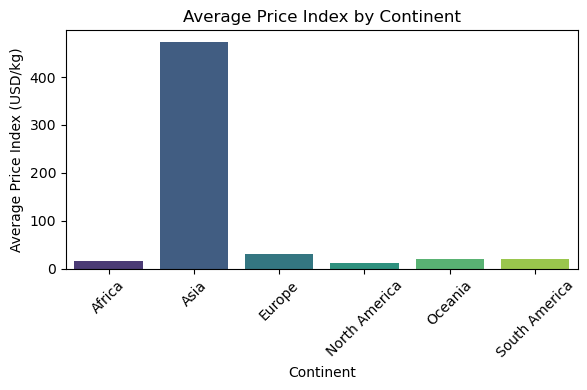

In [40]:
# Plotting the average price index by continent
plt.figure(figsize=(6, 4))
sns.barplot(x='continent', y='price_index', data=continent_price_index, palette='viridis')
plt.title('Average Price Index by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Price Index (USD/kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

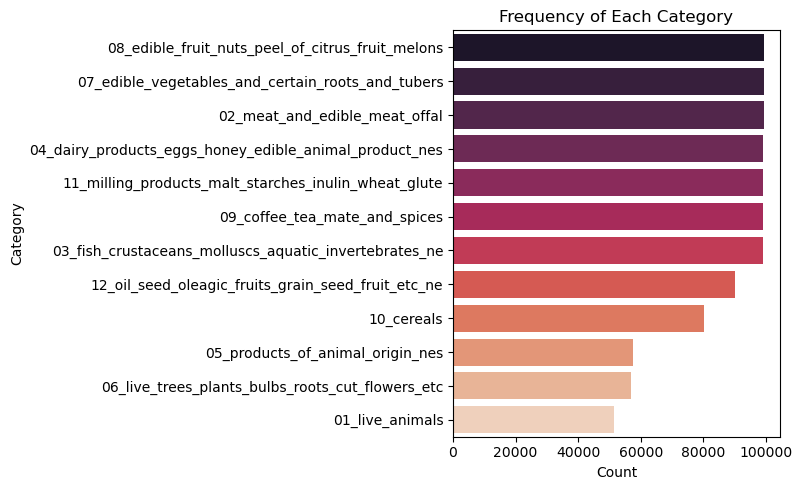

In [52]:
# Plotting the frequency of each category
plt.figure(figsize=(8, 5))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette='rocket')
plt.title('Frequency of Each Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

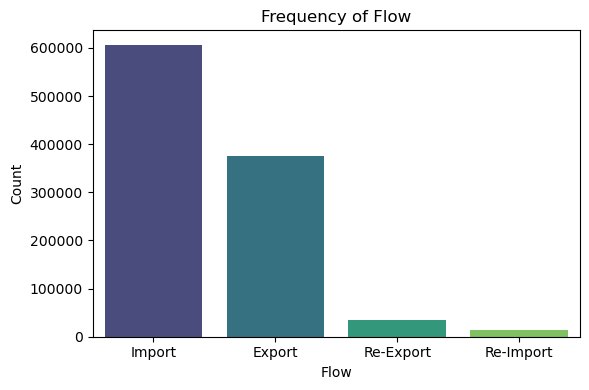

In [43]:
# Plotting the frequency of each flow
plt.figure(figsize=(6, 4))
sns.countplot(x='flow', data=df, order=df['flow'].value_counts().index, palette='viridis')
plt.title('Frequency of Flow')
plt.xlabel('Flow')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
#countries with the most export

In [44]:
import_df = df[df['flow'] == 'Import']
# Aggregating the import values by country
country_imports = import_df.groupby('country_or_area')['trade_usd'].sum().reset_index()
# Sorting the countries by total import value in descending order
country_imports = country_imports.sort_values(by='trade_usd', ascending=False)
country_imports

country_or_area      trade_usd
55                      EU-28  1062021368450
71                    Germany   827379219575
38                      China   654251249593
92                      Japan   606100392419
65                     France   425954136687
..                        ...            ...
119                Montserrat       10176927
181  Turks and Caicos Islands        5168071
177                     Tonga        4278230
193         Wallis and Futuna        3483194
182                    Tuvalu        2764239

[203 rows x 2 columns]

In [47]:
#filtering out the top 10 countries by trade value
top_10_imports = country_imports.head(10)
top_10_imports

country_or_area      trade_usd
55                  EU-28  1062021368450
71                Germany   827379219575
38                  China   654251249593
92                  Japan   606100392419
65                 France   425954136687
90                  Italy   349761661596
18                Belgium   288829556239
34                 Canada   251828129154
39   China, Hong Kong SAR   222303382242
125           Netherlands   182930211166

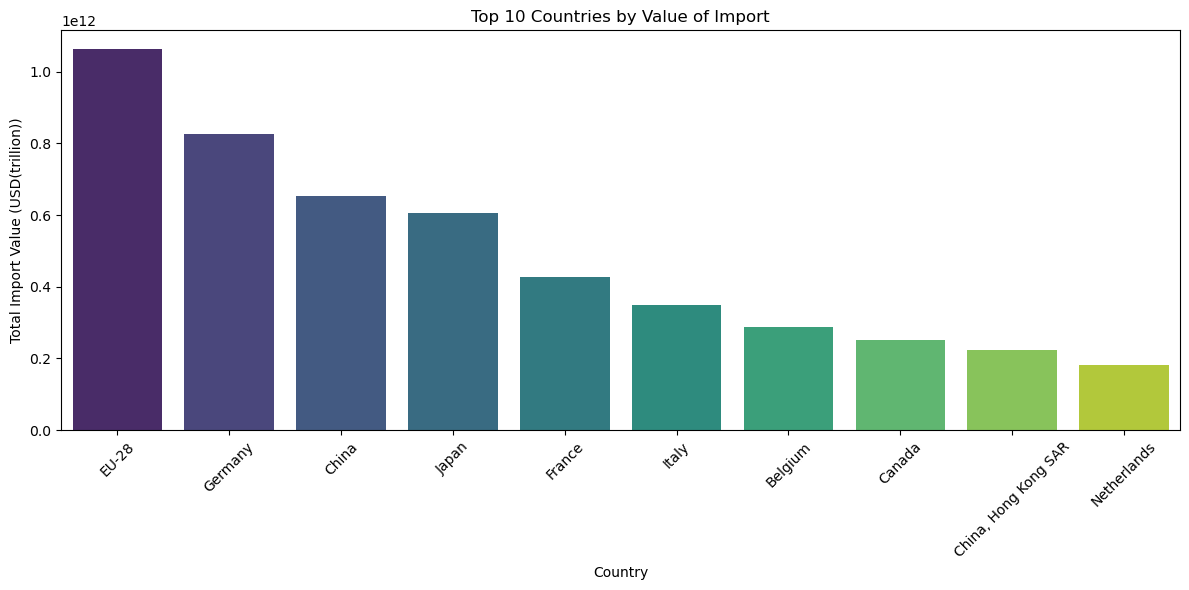

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(y='trade_usd', x='country_or_area', data=top_10_imports, palette='viridis')
plt.title('Top 10 Countries by Value of Import')
plt.xlabel('Country')
plt.ylabel('Total Import Value (USD(trillion))')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Countries by Export Value

In [49]:
export_df = df[df['flow'] == 'Export']
country_exports = export_df.groupby('country_or_area')['trade_usd'].sum().reset_index()
country_exports = country_exports.sort_values(by='trade_usd', ascending=False)
country_exports 

country_or_area     trade_usd
54                      EU-28  633680335085
64                     France  560525444372
70                    Germany  554008047752
26                     Brazil  544158324226
34                     Canada  501178867372
..                        ...           ...
181  Turks and Caicos Islands        128617
102                     Libya         33965
119                Montserrat         23589
175               Timor-Leste         17699
112                Mauritania          7683

[201 rows x 2 columns]

In [50]:
#Getting the top 10 countries by export
top_10_exports = country_exports.head(10)
top_10_exports

country_or_area     trade_usd
54            EU-28  633680335085
64           France  560525444372
70          Germany  554008047752
26           Brazil  544158324226
34           Canada  501178867372
37            China  450891609268
182             USA  438770360311
10        Australia  382129461286
125     Netherlands  377665462517
18          Belgium  280249092800

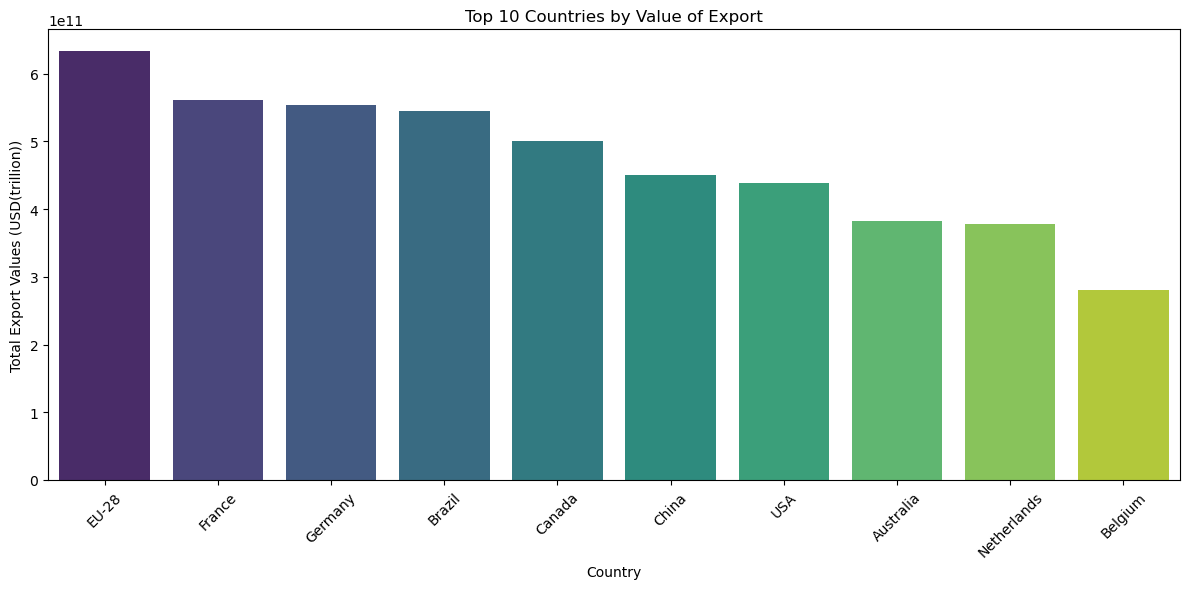

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(y='trade_usd', x='country_or_area', data=top_10_exports, palette='viridis')
plt.title('Top 10 Countries by Value of Export')
plt.xlabel('Country')
plt.ylabel('Total Export Values (USD(trillion))')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Import and Export of Live Animals

In [66]:
live_animals = df[(df['flow']=='Export')&(df['category']=='01_live_animals')]
live_animals

country_or_area  year  comm_code  \
0         Afghanistan  2016      10410   
1         Afghanistan  2016      10420   
6             Albania  2016      10511   
10            Albania  2016      10600   
18            Albania  2015      10600   
...               ...   ...        ...   
56550        Zimbabwe  2000      10511   
56551        Zimbabwe  2000      10519   
56552        Zimbabwe  2000      10591   
56553        Zimbabwe  2000      10599   
56554        Zimbabwe  2000      10600   

                                              commodity    flow  trade_usd  \
0                                           Sheep, live  Export       6088   
1                                           Goats, live  Export       3958   
6                      Fowls, live domestic < 185 grams  Export      87581   
10                   Animals, live, except farm animals  Export     584025   
18                   Animals, live, except farm animals  Export     636184   
...                                                 ...     ...        ...   
56550                  Fowls, live domestic < 185 grams  Export    2360510   
56551  Poultry, live except domestic fowls, < 185 grams  Export      20017   
56552                  Fowls, live domestic > 185 grams  Export      18706   
56553  Poultry, live except domestic fowls, > 185 grams  Export         94   
56554                Animals, live, except farm animals  Export      43788   

       weight_kg        quantity_name  quantity         category  price_index  \
0         2339.0      Number of items      51.0  01_live_animals     2.602822   
1          984.0      Number of items      53.0  01_live_animals     4.022358   
6         5320.0      Number of items  115180.0  01_live_animals    16.462594   
10       59521.0      Number of items   59521.0  01_live_animals     9.812083   
18       80774.0      Number of items   80694.0  01_live_animals     7.876099   
...          ...                  ...       ...              ...          ...   
56550   233943.0  Weight in kilograms  233943.0  01_live_animals    10.090107   
56551      471.0  Weight in kilograms     471.0  01_live_animals    42.498938   
56552    15655.0  Weight in kilograms   15655.0  01_live_animals     1.194890   
56553        4.0  Weight in kilograms       4.0  01_live_animals    23.500000   
56554     3174.0  Weight in kilograms    3174.0  01_live_animals    13.795841   

      continent  
0          Asia  
1          Asia  
6        Europe  
10       Europe  
18       Europe  
...         ...  
56550    Africa  
56551    Africa  
56552    Africa  
56553    Africa  
56554    Africa  

[20907 rows x 12 columns]

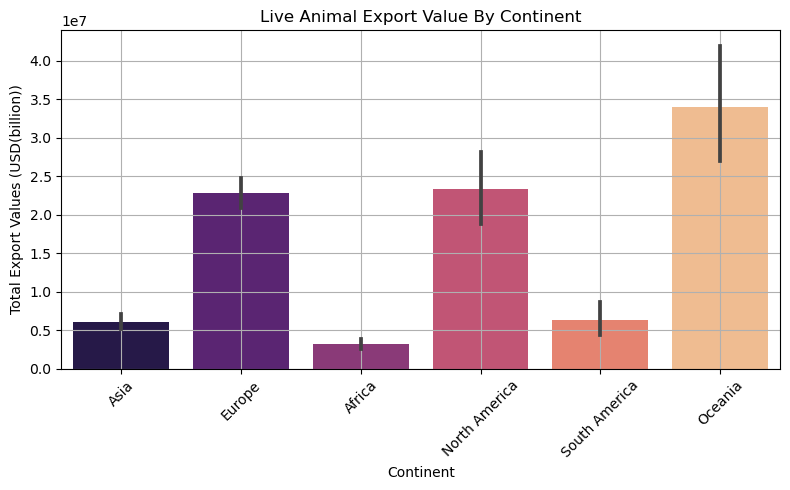

In [108]:
plt.figure(figsize=(8,5))
sns.barplot(y='trade_usd', x='continent', data=live_animals, palette='magma')
plt.title('Live Animal Export Value By Continent')
plt.xlabel('Continent')
plt.ylabel('Total Export Values (USD(billion))')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [68]:
live_animals1 = df[(df['flow']=='Import')&(df['category']=='01_live_animals')]
live_animals1

country_or_area  year  comm_code  \
2         Afghanistan  2008      10210   
3             Albania  2016      10290   
4             Albania  2016      10392   
5             Albania  2016      10511   
7             Albania  2016      10519   
...               ...   ...        ...   
56500        Zimbabwe  2004      10310   
56501        Zimbabwe  2004      10392   
56502        Zimbabwe  2004      10511   
56504        Zimbabwe  2004      10519   
56506        Zimbabwe  2004      10600   

                                              commodity    flow  trade_usd  \
2               Bovine animals, live pure-bred breeding  Import    1026804   
3       Bovine animals, live, except pure-bred breeding  Import    2414533   
4         Swine, live except pure-bred breeding > 50 kg  Import   14265937   
5                      Fowls, live domestic < 185 grams  Import    2671732   
7      Poultry, live except domestic fowls, < 185 grams  Import      26485   
...                                                 ...     ...        ...   
56500                    Swine, live pure-bred breeding  Import      13708   
56501     Swine, live except pure-bred breeding > 50 kg  Import      55547   
56502                  Fowls, live domestic < 185 grams  Import     759179   
56504  Poultry, live except domestic fowls, < 185 grams  Import       7163   
56506                Animals, live, except farm animals  Import       9907   

       weight_kg        quantity_name   quantity         category  \
2          272.0      Number of items     3769.0  01_live_animals   
3      1114023.0      Number of items     6853.0  01_live_animals   
4      9484953.0      Number of items    96040.0  01_live_animals   
5       254652.0      Number of items  5629138.0  01_live_animals   
7         2908.0      Number of items    64000.0  01_live_animals   
...          ...                  ...        ...              ...   
56500     1500.0  Weight in kilograms     1500.0  01_live_animals   
56501     3875.0  Weight in kilograms     3875.0  01_live_animals   
56502     4530.0  Weight in kilograms     4530.0  01_live_animals   
56504       74.0  Weight in kilograms       74.0  01_live_animals   
56506     5756.0  Weight in kilograms     5756.0  01_live_animals   

       price_index continent  
2      3775.014706      Asia  
3         2.167400    Europe  
4         1.504060    Europe  
5        10.491698    Europe  
7         9.107634    Europe  
...            ...       ...  
56500     9.138667    Africa  
56501    14.334710    Africa  
56502   167.589183    Africa  
56504    96.797297    Africa  
56506     1.721161    Africa  

[28687 rows x 12 columns]

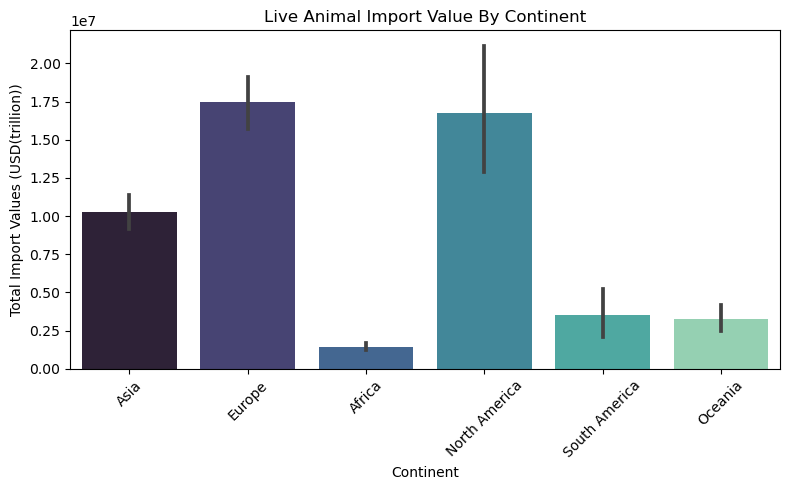

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(y='trade_usd', x='continent', data=live_animals1, palette='mako')
plt.title('Live Animal Import Value By Continent')
plt.xlabel('Continent')
plt.ylabel('Total Import Values (USD(trillion))')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#coffee, tea and spices export

In [71]:
coffee_tea_export = df[(df['flow']=='Export')&(df['category']=='09_coffee_tea_mate_and_spices')]
coffee_tea_export

country_or_area  year  comm_code             commodity    flow  \
676240     Afghanistan  2016      90300                  Mate  Export   
676241     Afghanistan  2016      90920       Coriander seeds  Export   
676242     Afghanistan  2016      90930           Cumin seeds  Export   
676243     Afghanistan  2016      91020               Saffron  Export   
676244     Afghanistan  2016      91099            Spices nes  Export   
...                ...   ...        ...                   ...     ...   
776229       Mauritius  2002      91010                Ginger  Export   
776231       Mauritius  2002      91020               Saffron  Export   
776233       Mauritius  2002      91030    Turmeric (curcuma)  Export   
776235       Mauritius  2002      91040  Thyme and bay leaves  Export   
776237       Mauritius  2002      91050                 Curry  Export   

        trade_usd  weight_kg        quantity_name   quantity  \
676240    2436431  2204973.0  Weight in kilograms  2204973.0   
676241     458385   223854.0  Weight in kilograms   223854.0   
676242   24003685  5924356.0  Weight in kilograms  5924356.0   
676243    3868724     2402.0  Weight in kilograms     2402.0   
676244      60363     3982.0  Weight in kilograms     3982.0   
...           ...        ...                  ...        ...   
776229        276      500.0  Weight in kilograms      500.0   
776231        742      330.0  Weight in kilograms      330.0   
776233        333      233.0  Weight in kilograms      233.0   
776235        919      187.0  Weight in kilograms      187.0   
776237       8248     2881.0  Weight in kilograms     2881.0   

                             category  price_index continent  
676240  09_coffee_tea_mate_and_spices     1.104971      Asia  
676241  09_coffee_tea_mate_and_spices     2.047696      Asia  
676242  09_coffee_tea_mate_and_spices     4.051695      Asia  
676243  09_coffee_tea_mate_and_spices  1610.626145      Asia  
676244  09_coffee_tea_mate_and_spices    15.158965      Asia  
...                               ...          ...       ...  
776229  09_coffee_tea_mate_and_spices     0.552000    Africa  
776231  09_coffee_tea_mate_and_spices     2.248485    Africa  
776233  09_coffee_tea_mate_and_spices     1.429185    Africa  
776235  09_coffee_tea_mate_and_spices     4.914439    Africa  
776237  09_coffee_tea_mate_and_spices     2.862895    Africa  

[35849 rows x 12 columns]

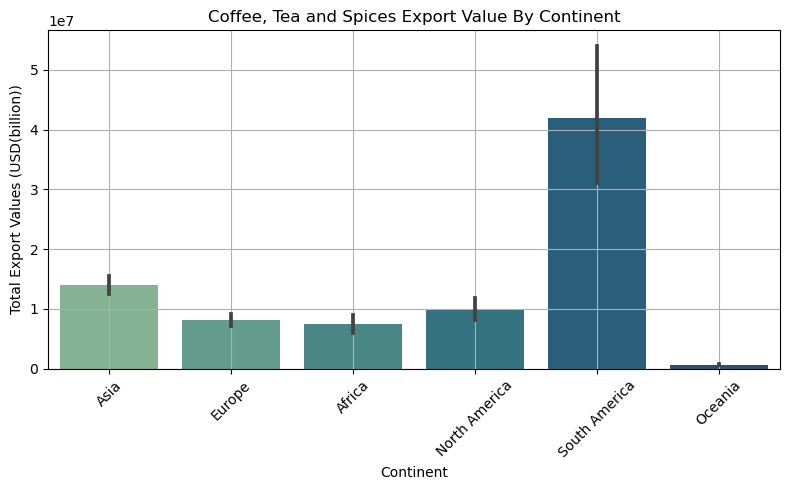

In [107]:
plt.figure(figsize=(8,5))
sns.barplot(y='trade_usd', x='continent', data=coffee_tea_export, palette='crest')
plt.title('Coffee, Tea and Spices Export Value By Continent')
plt.xlabel('Continent')
plt.ylabel('Total Export Values (USD(billion))')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [73]:
coffee_tea_import = df[(df['flow']=='Import')&(df['category']=='09_coffee_tea_mate_and_spices')]
coffee_tea_import

country_or_area  year  comm_code  \
676238     Afghanistan  2016      90210   
676239     Afghanistan  2016      90230   
676245     Afghanistan  2015      90210   
676246     Afghanistan  2015      90230   
676252     Afghanistan  2014      90230   
...                ...   ...        ...   
776228       Mauritius  2002      91010   
776230       Mauritius  2002      91020   
776232       Mauritius  2002      91030   
776234       Mauritius  2002      91040   
776236       Mauritius  2002      91050   

                                                commodity    flow  trade_usd  \
676238        Tea, green (unfermented) in packages < 3 kg  Import   44819548   
676239  Tea, black (fermented or partly) in packages <...  Import   44851687   
676245        Tea, green (unfermented) in packages < 3 kg  Import   51338067   
676246  Tea, black (fermented or partly) in packages <...  Import   77686841   
676252  Tea, black (fermented or partly) in packages <...  Import  111710654   
...                                                   ...     ...        ...   
776228                                             Ginger  Import       3738   
776230                                            Saffron  Import     223549   
776232                                 Turmeric (curcuma)  Import     154357   
776234                               Thyme and bay leaves  Import       5306   
776236                                              Curry  Import      41215   

         weight_kg        quantity_name    quantity  \
676238  28093001.0  Weight in kilograms  28093001.0   
676239  23509706.0  Weight in kilograms  23509706.0   
676245  32447158.0  Weight in kilograms  32447158.0   
676246  39914377.0  Weight in kilograms  39914377.0   
676252  98678340.0  Weight in kilograms  98678340.0   
...            ...                  ...         ...   
776228      2522.0  Weight in kilograms      2522.0   
776230      3722.0  Weight in kilograms      3722.0   
776232    252274.0  Weight in kilograms    252274.0   
776234      1757.0  Weight in kilograms      1757.0   
776236     16039.0  Weight in kilograms     16039.0   

                             category  price_index continent  
676238  09_coffee_tea_mate_and_spices     1.595399      Asia  
676239  09_coffee_tea_mate_and_spices     1.907794      Asia  
676245  09_coffee_tea_mate_and_spices     1.582205      Asia  
676246  09_coffee_tea_mate_and_spices     1.946337      Asia  
676252  09_coffee_tea_mate_and_spices     1.132069      Asia  
...                               ...          ...       ...  
776228  09_coffee_tea_mate_and_spices     1.482157    Africa  
776230  09_coffee_tea_mate_and_spices    60.061526    Africa  
776232  09_coffee_tea_mate_and_spices     0.611862    Africa  
776234  09_coffee_tea_mate_and_spices     3.019920    Africa  
776236  09_coffee_tea_mate_and_spices     2.569674    Africa  

[57576 rows x 12 columns]

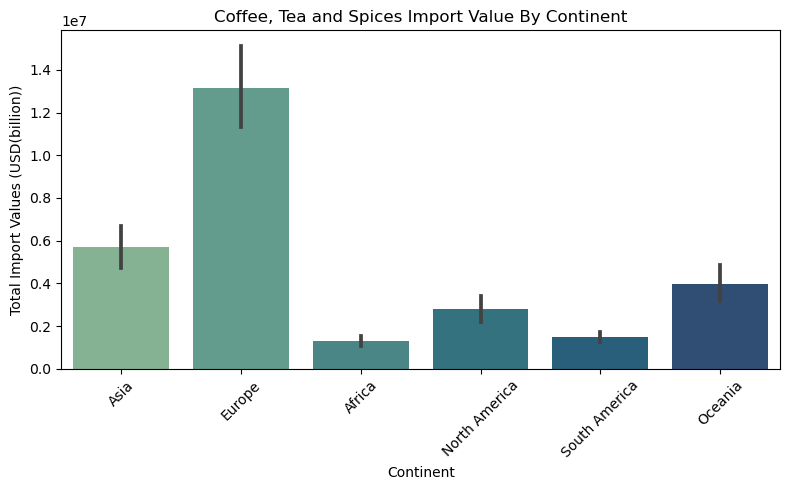

In [103]:
plt.figure(figsize=(8,5))
sns.barplot(y='trade_usd', x='continent', data=coffee_tea_import, palette='crest')
plt.title('Coffee, Tea and Spices Import Value By Continent')
plt.xlabel('Continent')
plt.ylabel('Total Import Values (USD(billion))')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

coffee, tea and spice import/export by countries

In [79]:
country_cti =coffee_tea_import.groupby('country_or_area')['trade_usd'].sum().reset_index()
country_cti= country_cti.sort_values(by='trade_usd', ascending = False)
country_cti

country_or_area     trade_usd
55           EU-28  137445185782
70         Germany   81439483015
91           Japan   40955493992
64          France   37045992317
89           Italy   27409930377
..             ...           ...
42         Comoros       1783161
36            Chad        949603
5         Anguilla        820517
44       Cook Isds        668296
78   Guinea-Bissau         95118

[117 rows x 2 columns]

In [97]:
top_5_cti_country = country_cti.head(5)
top_5_cti_country

country_or_area     trade_usd
55           EU-28  137445185782
70         Germany   81439483015
91           Japan   40955493992
64          France   37045992317
89           Italy   27409930377

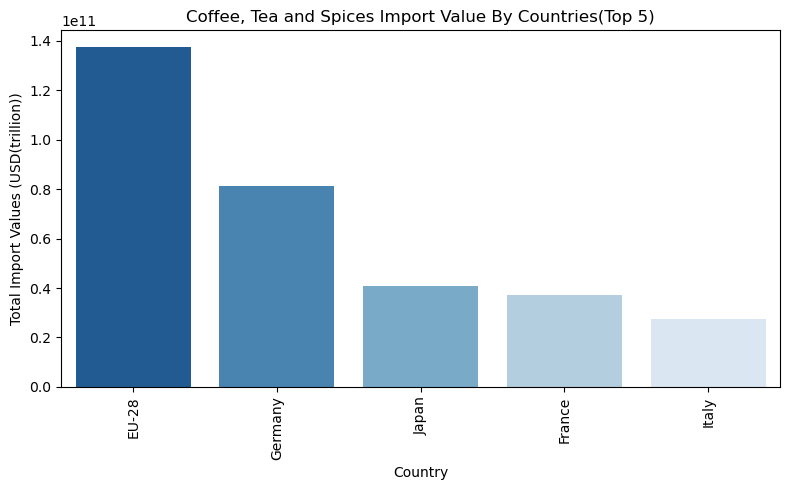

In [104]:
plt.figure(figsize=(8,5))
sns.barplot(y='trade_usd', x='country_or_area', data=top_5_cti_country, palette='Blues_r')
plt.title('Coffee, Tea and Spices Import Value By Countries(Top 5)')
plt.xlabel('Country')
plt.ylabel('Total Import Values (USD(trillion))')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [94]:
country_cte =coffee_tea_export.groupby('country_or_area')['trade_usd'].sum().reset_index()
country_cte= country_cte.sort_values(by='trade_usd', ascending = False)
top_5_cte_country = country_cte.head(5)
top_5_cte_country

country_or_area    trade_usd
26          Brazil  88351703431
40        Colombia  43422263924
68         Germany  40586089676
82           India  39676091599
83       Indonesia  30257942719

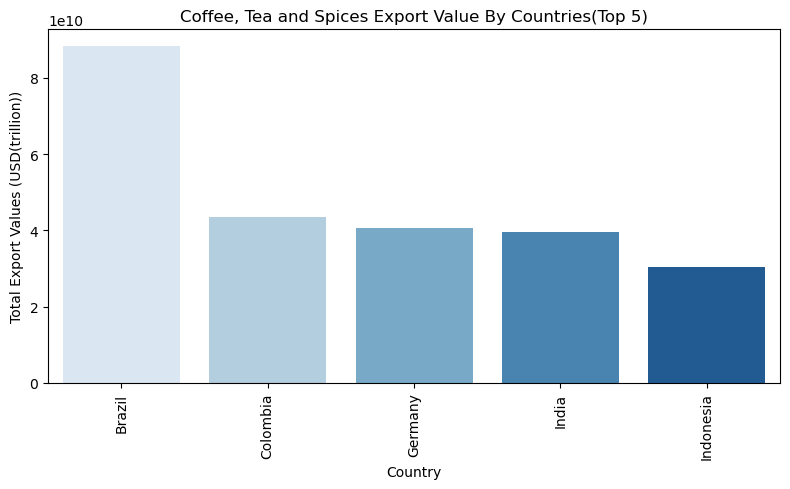

In [106]:
plt.figure(figsize=(8,5))
sns.barplot(y='trade_usd', x='country_or_area', data=top_5_cte_country, palette='Blues')
plt.title('Coffee, Tea and Spices Export Value By Countries(Top 5)')
plt.xlabel('Country')
plt.ylabel('Total Export Values (USD(trillion))')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()